In [119]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen, Request
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


In [4]:
def get_soup(url):
    req = Request(url, headers = {'User-agent':'Mozilla/5.0'})
    client = urlopen(req)
    html = client.read()
    client.close()
    the_soup = soup(html, 'html5lib')
    return the_soup

In [6]:
list = []
list_soup = get_soup('https://wheresthejump.com/full-movie-list/')
table_rows = list_soup.body.table.tbody.findAll("tr",{"class":re.compile("row-")})
for row in table_rows:
    columns = row.findAll("td")
    if len(columns) < 7:
        continue
    entry = {}
    entry["movie_name"] = columns[0].text
    entry["movie_link"] = columns[0].a["href"]
    entry["movie_director"] = columns[1].text
    entry["movie_year"] = columns[2].text
    entry["movie_jump_count"] = columns[3].text
    entry["movie_jump_rating"] = columns[4].text
    entry["movie_netflix"] = columns[5].text
    entry["movie_imdb"] = columns[6].text
    movie_link = columns[0].a["href"]
    movie_soup = get_soup(movie_link)
    html_sentences = movie_soup.findAll(text = re.compile('\d+:\d+'))
    if len(html_sentences) == 0:
        entry["sentence_first_scare"] = ''
        entry["timestamp_first_scare"] = '00:00'
        list.append(entry)
        continue
    clean_stamp_sentence = re.sub("<.*?>", "",str(html_sentences[0].parent))
    entry["sentence_first_scare"] = re.sub('\d+:\d+','',clean_stamp_sentence)
    timestamp_first_scare = re.match('\d+:\d+',clean_stamp_sentence)
    if timestamp_first_scare is None:
        continue
    entry["timestamp_first_scare"] = timestamp_first_scare.group()
    list.append(entry)

In [85]:
df = pd.DataFrame(list)
df.head()

,movie_director,movie_imdb,movie_jump_count,movie_jump_rating,movie_link,movie_name,movie_netflix,movie_year,sentence_first_scare,timestamp_first_scare
0,Dan Trachtenberg,7.2,8,2.5,https://wheresthejump.com/jump-scares-in-10-cl...,10 Cloverfield Lane,No,2016,– A vehicle suddenly crashes into Michelle’s ...,5:13
1,Danny Boyle,7.6,10,3,https://wheresthejump.com/jump-scares-in-28-da...,28 Days Later,No,2003,– A chimpanzee makes a loud noise.,2:12
2,Juan Carlos Fresnadillo,7,17,3.5,https://wheresthejump.com/jump-scares-in-28-we...,28 Weeks Later,No,2007,– Karen looks outside through a gap in the wa...,6:17
3,David Slade,6.6,9,2.5,https://wheresthejump.com/jump-scares-in-30-da...,30 Days of Night,No,2007,– A silhouette runs past the camera.,17:25
4,Rob Zombie,5.1,8,2.5,https://wheresthejump.com/jump-scares-in-31-2016/,31,No,2016,– Sick-Head suddenly appears underneath the d...,35:28


In [109]:
df['timestamp_first_scare'] = df['timestamp_first_scare'].apply(lambda x : '0' + x if len(x) == 4 else x)
df_split = df['timestamp_first_scare'].str.split(':',expand = True)
df_split[0] = df_split[0].astype(float)
df_split[1] = df_split[1].astype(float)
df['seconds_first_scare'] = (df_split[0] * 60) + df_split[1]
test_df = df[['movie_imdb','movie_jump_count','movie_jump_rating','movie_name','seconds_first_scare']]
test_df.iloc[:,0] = test_df.iloc[:,0].astype(float)
test_df.iloc[:,1] = test_df.iloc[:,1].astype(float)
test_df.iloc[:,2] = test_df.iloc[:,2].astype(float)
test_df.iloc[:,4] = test_df.iloc[:,4].astype('category')
df = df.sort_values(by = ['seconds_first_scare'])
test_df

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,movie_imdb,movie_jump_count,movie_jump_rating,movie_name,seconds_first_scare
95,5.8,0.0,0.0,Dismissed,0.0
9,7.0,0.0,0.0,A Girl Walks Home Alone at Night,0.0
124,7.2,0.0,0.0,Frailty,0.0
277,8.0,0.0,0.0,Rosemary's Baby,0.0
292,6.4,0.0,0.0,Session 9,0.0
420,6.1,0.0,0.0,The Ones Below,0.0
149,6.2,0.0,0.0,Hannibal Rising,0.0
504,6.2,0.0,0.0,Wolf Creek,0.0
233,6.2,0.0,0.0,My Friend Dahmer,0.0
240,7.3,0.0,0.0,Only Lovers Left Alive,0.0


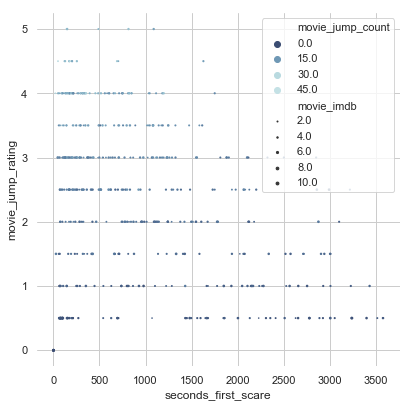

In [113]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="seconds_first_scare", y="movie_jump_rating",
                hue="movie_jump_count", size="movie_imdb",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=test_df, ax=ax)

In [15]:
import pandas as pd

df = pd.read_csv('data.csv', index_col =  0)
df.head()

,Movie Name,Link,Director,Year,Jump Count,Jump Scare Rating,Netflix (US),IMDB Rating,First Scare Sentence,First Scare Timestamp
0,10 Cloverfield Lane,https://wheresthejump.com/jump-scares-in-10-cl...,Dan Trachtenberg,2016,8,2.5,No,7.2,– A vehicle suddenly crashes into Michelle’s ...,5:13
1,28 Days Later,https://wheresthejump.com/jump-scares-in-28-da...,Danny Boyle,2003,10,3.0,No,7.6,– A chimpanzee makes a loud noise.,2:12
2,28 Weeks Later,https://wheresthejump.com/jump-scares-in-28-we...,Juan Carlos Fresnadillo,2007,17,3.5,No,7.0,– Karen looks outside through a gap in the wa...,6:17
3,30 Days of Night,https://wheresthejump.com/jump-scares-in-30-da...,David Slade,2007,9,2.5,No,6.6,– A silhouette runs past the camera.,17:25
4,31,https://wheresthejump.com/jump-scares-in-31-2016/,Rob Zombie,2016,8,2.5,No,5.1,– Sick-Head suddenly appears underneath the d...,35:28


In [6]:
df['First Scare Timestamp'] = df['First Scare Timestamp'].apply(lambda x: '0' + x if len(x) == 4 else x)
df_split = df['First Scare Timestamp'].str.split(':', expand=True)

In [11]:
def to_seconds(df):
    temp_df = df['First Scare Timestamp'].apply(lambda x: '0' + x if len(x) == 4 else x)
    temp_df = temp_df.str.split(':', expand=True)
    temp_df[0] = temp_df[0].astype(float)
    temp_df[1] = temp_df[1].astype(float)
    df['Seconds to First Scare'] = (temp_df[0] * 60) + temp_df[1]

In [12]:
df = to_seconds(df)

In [16]:
df['First Scare Timestamp'] = df['First Scare Timestamp'].apply(lambda x: '0' + x if len(x) == 4 else x)
temp_df = df['First Scare Timestamp'].str.split(':', expand=True)
temp_df[0] = temp_df[0].astype(float)
temp_df[1] = temp_df[1].astype(float)
df['Seconds to First Scare'] = (temp_df[0] * 60) + temp_df[1]

In [17]:
df.head()

,Movie Name,Link,Director,Year,Jump Count,Jump Scare Rating,Netflix (US),IMDB Rating,First Scare Sentence,First Scare Timestamp,Seconds to First Scare
0,10 Cloverfield Lane,https://wheresthejump.com/jump-scares-in-10-cl...,Dan Trachtenberg,2016,8,2.5,No,7.2,– A vehicle suddenly crashes into Michelle’s ...,05:13,313.0
1,28 Days Later,https://wheresthejump.com/jump-scares-in-28-da...,Danny Boyle,2003,10,3.0,No,7.6,– A chimpanzee makes a loud noise.,02:12,132.0
2,28 Weeks Later,https://wheresthejump.com/jump-scares-in-28-we...,Juan Carlos Fresnadillo,2007,17,3.5,No,7.0,– Karen looks outside through a gap in the wa...,06:17,377.0
3,30 Days of Night,https://wheresthejump.com/jump-scares-in-30-da...,David Slade,2007,9,2.5,No,6.6,– A silhouette runs past the camera.,17:25,1045.0
4,31,https://wheresthejump.com/jump-scares-in-31-2016/,Rob Zombie,2016,8,2.5,No,5.1,– Sick-Head suddenly appears underneath the d...,35:28,2128.0


In [22]:
import plotly.express as px

fig = px.scatter(df,x='Seconds to First Scare',y='Jump Scare Rating')
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'hoverlabel': {'namelength': 0},
              'hovertemplate': 'Seconds to First Scare=%{x}<br>Jump Scare Rating=%{y}',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scatter',
              'x': array([313., 132., 377., ..., 252., 148.,  46.]),
              'xaxis': 'x',
              'y': array([2.5, 3. , 3.5, ..., 3. , 0.5, 3. ]),
              'yaxis': 'y'}],
    'layout': {'height': 600,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.98], 'title': {'text': 'Seconds to First Scare'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Jump Scare Rating'}}}
})>